# KDD Pokemon

## Exploarcion de los datos

Esta parte es para entender los datos y ver que tipo de datos tenemos, como los trataremos, que metodos usaremos, etc. Pero principalmente para **investigar** que queremos descubrir con los datos.


In [2]:
# Imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Data
pokemon_df = pd.read_csv("data/all_pokemon_data.csv")

pokemon_df.head()

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,...,Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,grass,poison,True,generation-i,False,Base,False,1,...,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,grass,poison,True,generation-i,False,Base,False,2,...,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,grass,poison,True,generation-i,False,Base,False,3,...,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,grass,poison,True,generation-i,True,Mega,True,3,...,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,fire,NaN,False,generation-i,False,Base,False,1,...,85,24,19,309,39,52,43,60,50,65


In [ ]:
# Explore data
pokemon_df.describe()

,National Dex #,Evolution Stage,Number of Evolution,Catch Rate,Height (dm),Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,494.978041,1.597128,2.108108,92.202703,12.829392,730.995777,50.535473,161.163851,441.633446,70.910473,80.989020,74.817568,72.922297,72.265203,69.728885
std,299.166288,0.700700,0.735618,75.715485,13.646223,1311.060248,53.682455,289.037497,119.296702,26.406800,31.955337,30.324208,32.426324,27.095940,30.110391
min,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,230.750000,1.000000,2.000000,45.000000,6.000000,89.750000,24.000000,20.000000,330.000000,52.000000,57.000000,52.000000,50.000000,51.000000,45.000000
50%,486.500000,1.000000,2.000000,60.000000,10.000000,300.000000,39.000000,66.000000,464.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,751.250000,2.000000,3.000000,127.000000,16.000000,775.500000,63.000000,171.250000,520.000000,85.000000,100.000000,91.000000,95.000000,90.000000,91.000000
max,1025.000000,3.000000,3.000000,255.000000,200.000000,9999.000000,787.000000,2204.000000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000


In [43]:
pokemon_df.isnull().sum(),
pokemon_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1184 non-null   object
 1   National Dex #         1184 non-null   int64 
 2   Primary Typing         1184 non-null   object
 3   Secondary Typing       654 non-null    object
 4   Secondary Typing Flag  1184 non-null   bool  
 5   Generation             1184 non-null   object
 6   Legendary Status       1184 non-null   bool  
 7   Form                   1184 non-null   object
 8   Alt Form Flag          1184 non-null   bool  
 9   Evolution Stage        1184 non-null   int64 
 10  Number of Evolution    1184 non-null   int64 
 11  Color ID               1184 non-null   object
 12  Catch Rate             1184 non-null   int64 
 13  Height (dm)            1184 non-null   int64 
 14  Weight (hg)            1184 non-null   int64 
 15  Height (in)          

In [44]:
unique_values = df.nunique()
unique_values

Name                     1184
National Dex #           1025
Primary Typing             18
Secondary Typing           18
Secondary Typing Flag       2
Generation                  9
Legendary Status            2
Form                       57
Alt Form Flag               2
Evolution Stage             3
Number of Evolution         3
Color ID                   10
Catch Rate                 38
Height (dm)                60
Weight (hg)               525
Height (in)                60
Weight (lbs)              328
Base Stat Total           228
Health                    109
Attack                    126
Defense                   114
Special Attack            127
Special Defense           106
Speed                     125
dtype: int64

---

# 🧠 Proyecto: ¿Qué hace legendario a un Pokémon?

## 🎯 Objetivo

Este proyecto busca descubrir qué hace que un Pokémon sea considerado **legendario**. A partir del análisis de sus características, se pretende identificar patrones que lo distingan del resto y construir un modelo de **clasificación** que permita predecir si un Pokémon es legendario o no con base en sus atributos.

---

## 🧪 Metodología

### 1️⃣ Proceso de KDD (Knowledge Discovery in Databases)

#### 🔍 Selección del conjunto de datos
- Se seleccionarán columnas relevantes como:
  - Estadísticas base (`HP`, `Attack`, `Defense`, etc.)
  - Tipos primario y secundario
  - Generación
  - Variable objetivo: **Legendario** (`True`/`False`)

#### 🧹 Limpieza y preprocesamiento
- Eliminación o transformación de columnas irrelevantes (e.g., `Name`, formas alternativas).
- Tratamiento de valores nulos (e.g., `Type 2`).
- Codificación de variables categóricas (`One-Hot` o `Label Encoding`).
- Normalización de variables numéricas si es necesario.

#### 🔧 Transformación de datos
- Creación de nuevas variables:
  - Indicador de segundo tipo
  - Combinaciones de tipos
- Análisis de correlación entre variables para entender relaciones clave.

---

### 2️⃣ Estrategia de solución (Modelado)

- Dividir los datos en conjunto de **entrenamiento** y **prueba**.
- Probar distintos modelos de clasificación:
  - Regresión logística (modelo base)
  - Árboles de decisión
  - Random Forest
  - XGBoost
- Evaluar la **importancia de variables predictoras** para interpretar mejor los resultados.

---

### 3️⃣ Evaluación del modelo

Se utilizarán las siguientes métricas para comparar el desempeño de los modelos:

- ✔️ **Accuracy**
- 📊 **Precisión**
- 📉 **Recall**
- ⚖️ **F1-score**
- 🧮 **Matriz de confusión**
- 📈 **AUC-ROC** (si aplica)

---

### 4️⃣ Propuestas de mejora

- Comparar el rendimiento entre diferentes modelos.
- Aplicar técnicas de **ajuste de hiperparámetros** (`GridSearchCV`).
- Abordar posibles problemas de desbalance de clases (pocos legendarios).
- Probar técnicas de ensamblado como:
  - **XGBoost**
  - **LightGBM**
- Aplicar herramientas de **interpretabilidad** como:
  - `SHAP`
  - Importancia de variables

---

### 5️⃣ Conclusiones esperadas

- ¿Cuáles son las características más determinantes en un Pokémon legendario?
- ¿Qué tan bien generaliza el modelo para predecir nuevos casos?
- ¿Es posible confiar en el modelo como herramienta predictiva?


In [45]:
# Selección de variables relevantes para predecir si un Pokémon es legendario

# Columnas a eliminar (por ser identificadores o redundantes)
columns_to_drop = [
    "Name",  # identificador no predictivo
    "Form",  # variantes poco útiles
    "Alt Form Flag",  # redundante con 'Form'
    "National Dex #",  # identificador
    "Weight (lbs)", "Weight (hg)",  # redundancia
    "Height (in)", "Height (dm)",  # redundancia
]


In [46]:
# Dataset limpio inicial
clean_df = pokemon_df.drop(columns=columns_to_drop)

clean_df.head()

,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Evolution Stage,Number of Evolution,Color ID,Catch Rate,Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,grass,poison,True,generation-i,False,1,3,green,45,318,45,49,49,65,65,45
1,grass,poison,True,generation-i,False,2,3,green,45,405,60,62,63,80,80,60
2,grass,poison,True,generation-i,False,3,3,green,45,525,80,82,83,100,100,80
3,grass,poison,True,generation-i,True,3,3,green,45,625,80,100,123,122,120,80
4,fire,NaN,False,generation-i,False,1,3,red,45,309,39,52,43,60,50,65


In [50]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np


# Copiamos el dataset para preprocesarlo
df_preprocessed = clean_df.copy()

In [52]:
# Paso 1: Llenar valores nulos en "Secondary Typing" con "None"
df_preprocessed["Secondary Typing"] = df_preprocessed["Secondary Typing"].fillna("None")
df_preprocessed.head()

,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Evolution Stage,Number of Evolution,Color ID,Catch Rate,Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,grass,poison,True,generation-i,False,1,3,green,45,318,45,49,49,65,65,45
1,grass,poison,True,generation-i,False,2,3,green,45,405,60,62,63,80,80,60
2,grass,poison,True,generation-i,False,3,3,green,45,525,80,82,83,100,100,80
3,grass,poison,True,generation-i,True,3,3,green,45,625,80,100,123,122,120,80
4,fire,None,False,generation-i,False,1,3,red,45,309,39,52,43,60,50,65


In [ ]:
# Paso 2: Codificación de variables categóricas
categorical_columns = ["Primary Typing", "Secondary Typing", "Generation", "Color ID"]


In [54]:
# Aplicamos OneHotEncoding
encoder = OneHotEncoder(sparse_output=False, drop="first")  # drop='first' para evitar multicolinealidad
encoded_features = encoder.fit_transform(df_preprocessed[categorical_columns])

In [55]:
# Nombres de las nuevas columnas codificadas
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Convertimos a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_preprocessed.index)


In [56]:
# Concatenamos con el dataset original y eliminamos las columnas categóricas originales
df_preprocessed = pd.concat([df_preprocessed.drop(columns=categorical_columns), encoded_df], axis=1)

# Verificamos el resultado
df_preprocessed.head()



,Secondary Typing Flag,Legendary Status,Evolution Stage,Number of Evolution,Catch Rate,Base Stat Total,Health,Attack,Defense,Special Attack,...,Generation_generation-viii,Color ID_blue,Color ID_brown,Color ID_gray,Color ID_green,Color ID_pink,Color ID_purple,Color ID_red,Color ID_white,Color ID_yellow
0,True,False,1,3,45,318,45,49,49,65,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,True,False,2,3,45,405,60,62,63,80,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,True,False,3,3,45,525,80,82,83,100,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,True,True,3,3,45,625,80,100,123,122,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,False,False,1,3,45,309,39,52,43,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Visualización de datos


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para visualización
sns.set(style="whitegrid")

In [58]:
# Convertimos el objetivo en string para mejor visualización
pokemon_df["Legendary Status"] = pokemon_df["Legendary Status"].astype(str)

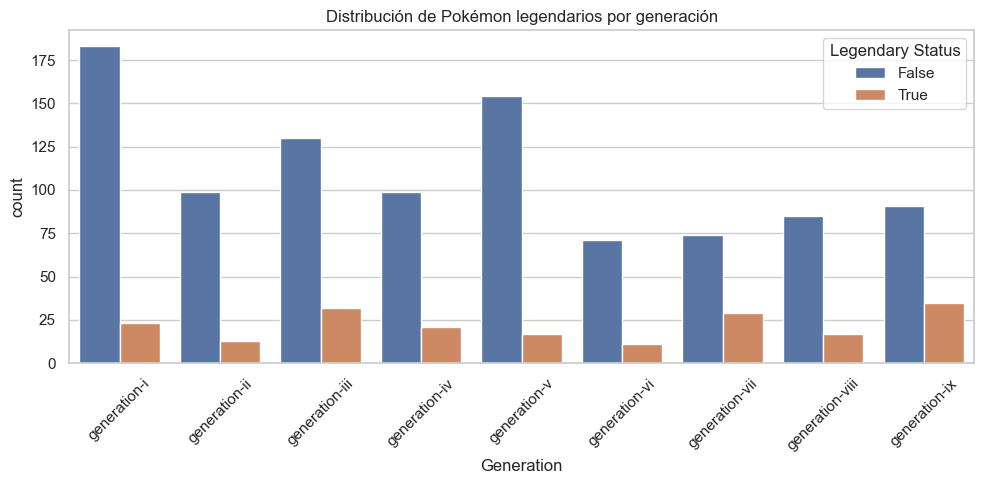

In [60]:
# Gráfico 1: Distribución de legendarios por generación
plt.figure(figsize=(10, 5))
sns.countplot(data=pokemon_df, x="Generation", hue="Legendary Status")
plt.title("Distribución de Pokémon legendarios por generación")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 Deducciones clave del gráfico

## 1 Desbalance de clases evidente:
  - La cantidad de Pokémon no legendarios (False) es mucho mayor que la de legendarios (True) en todas las generaciones.
  - Este desbalance puede afectar el rendimiento del modelo, favoreciendo la clase mayoritaria (no legendarios).

## 2 Los Pokémon legendarios están presentes en todas las generaciones:
  - Aunque en menor número, hay representación de legendarios desde generation-i hasta generation-ix.
  - Algunas generaciones (como la III, VII y IX) parecen tener más legendarios en comparación con otras.

## 3 Variabilidad por generación:
  - Generación I tiene el mayor número total de Pokémon, pero no necesariamente la mayor proporción de legendarios.
  - Algunas generaciones con pocos Pokémon totales tienen una proporción relativamente alta de legendarios (ej. IX).

<Figure size 1200x800 with 0 Axes>

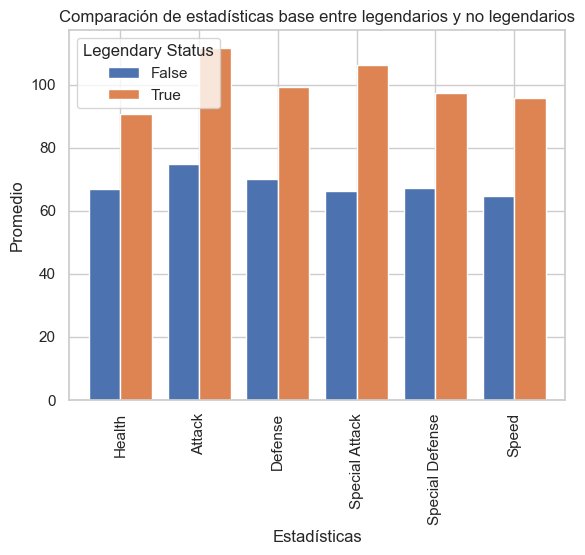

In [62]:
# Gráfico 2: Comparación de estadísticas base entre legendarios y no legendarios
stats = ["Health", "Attack", "Defense", "Special Attack", "Special Defense", "Speed"]
legendary_means = pokemon_df.groupby("Legendary Status")[stats].mean().T

plt.figure(figsize=(12, 8))
legendary_means.plot(kind="bar", width=0.8)
plt.title("Comparación de estadísticas base entre legendarios y no legendarios")
plt.xlabel("Estadísticas")
plt.ylabel("Promedio")
plt.legend(title="Legendary Status")
plt.show()


## 📊 Comparación de Estadísticas Base entre Legendarios y No Legendarios

El gráfico muestra la comparación de promedios para seis estadísticas clave de Pokémon, diferenciando entre legendarios y no legendarios.

### ✅ Deducciones destacadas:

- **Todas las estadísticas presentan valores promedio más altos en los Pokémon legendarios**, lo que confirma su superioridad general en atributos de combate.
- Las diferencias son consistentes en todas las categorías:
  - `Attack`, `Special Attack`, y `Special Defense` sobresalen como las estadísticas más elevadas en legendarios.
  - `Health`, `Defense`, y `Speed` también muestran incrementos notorios en legendarios respecto a no legendarios.
- No hay ninguna estadística en la que los no legendarios superen a los legendarios en promedio.

### 📌 Implicación para el modelo:

- Este patrón sugiere que las estadísticas base son indicadores poderosos para predecir si un Pokémon es legendario.
- Incluir estas variables en el entrenamiento del modelo mejorará significativamente la capacidad predictiva.

Este gráfico refuerza aún más la lógica de que los Pokémon legendarios están definidos por un perfil estadístico claramente superior.


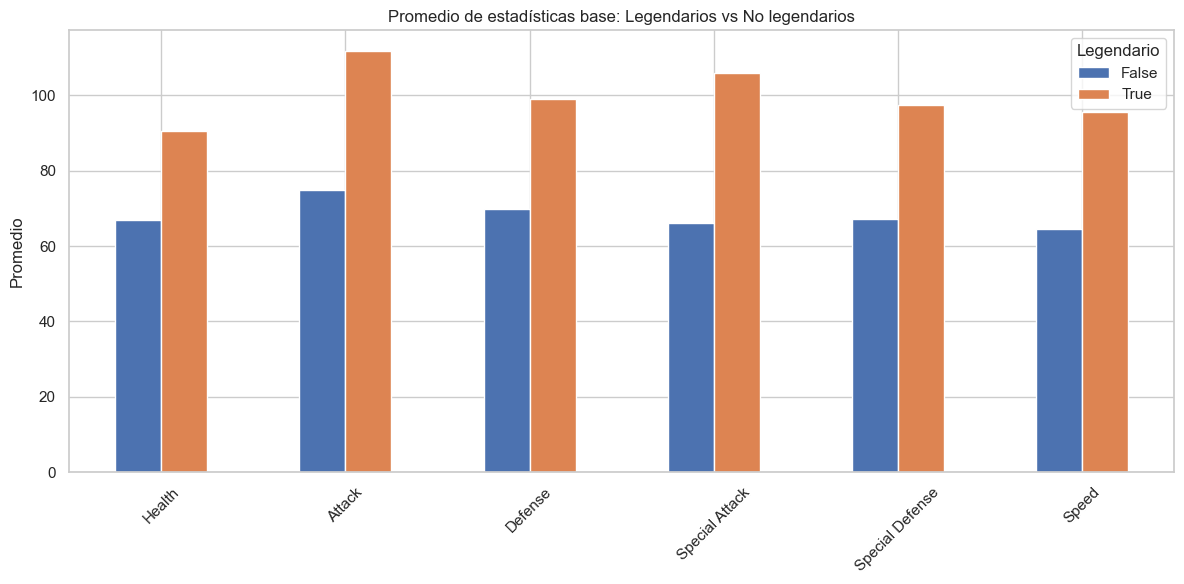

In [64]:
# Gráfico 3: Estadísticas promedio por tipo de Pokémon (legendario vs no)
legendary_means.plot(kind="bar", figsize=(12, 6))
plt.title("Promedio de estadísticas base: Legendarios vs No legendarios")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.legend(title="Legendario")
plt.tight_layout()
plt.show()

## 📊 Análisis del Promedio de Estadísticas Base: Legendarios vs No Legendarios

El gráfico compara el promedio de seis estadísticas base entre Pokémon legendarios y no legendarios. Las observaciones clave son:

### ✅ Deducciones principales:

- **Los Pokémon legendarios superan consistentemente a los no legendarios** en todas las estadísticas.
- La diferencia es particularmente marcada en:
  - `Attack`: donde los legendarios tienen un valor promedio significativamente mayor.
  - `Special Attack` y `Special Defense`: también muestran una diferencia notable.
- Incluso en estadísticas menos dominantes como `Health` y `Speed`, los legendarios tienen ventaja.

### 📌 Implicaciones para el modelo:

- Las estadísticas base son **variables predictoras muy relevantes** para determinar si un Pokémon es legendario.
- Es probable que modelos supervisados aprendan a clasificar correctamente utilizando estas diferencias numéricas claras.

Este gráfico refuerza la hipótesis de que los legendarios están diseñados para tener ventajas estadísticas claras frente al resto del universo Pokémon.


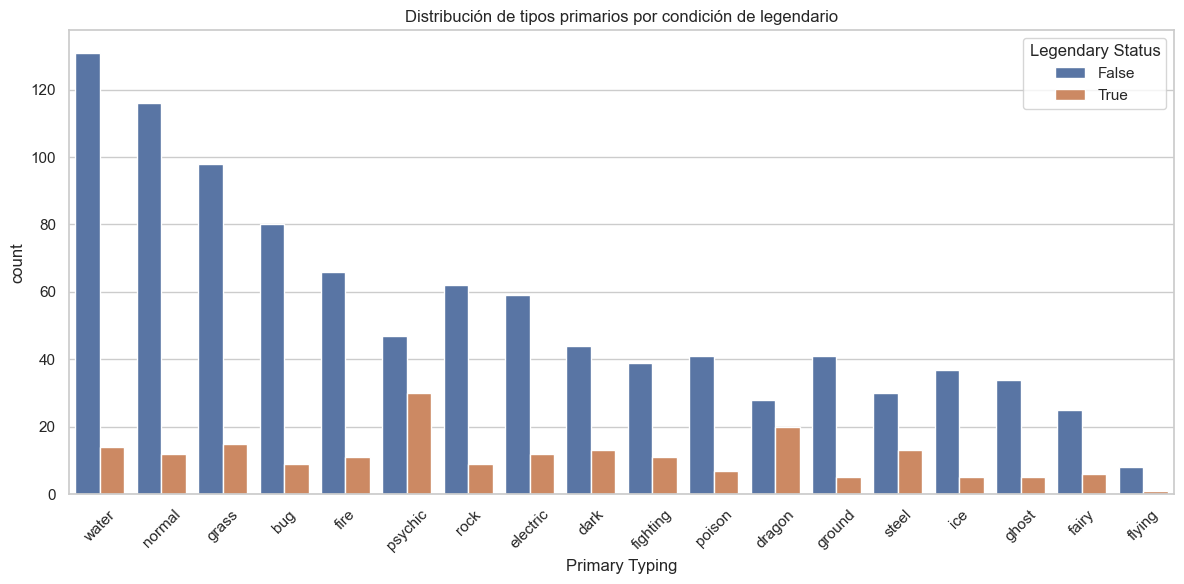

In [65]:
# Gráfico 4: Distribución del tipo primario según si es legendario o no
plt.figure(figsize=(12, 6))
sns.countplot(data=pokemon_df, x="Primary Typing", hue="Legendary Status", order=pokemon_df["Primary Typing"].value_counts().index)
plt.title("Distribución de tipos primarios por condición de legendario")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📊 Distribución de Tipos Primarios por Condición de Legendario

Este gráfico muestra cómo se distribuyen los tipos primarios (`Primary Typing`) entre Pokémon legendarios y no legendarios.

### ✅ Deducciones principales:

- **El tipo más común entre todos los Pokémon es `water`**, seguido por `normal`, `grass`, y `bug`, pero la mayoría de estos Pokémon **no son legendarios**.
- **Tipos como `psychic`, `dragon`, y `steel` tienen una proporción significativamente mayor de Pokémon legendarios** en comparación con otros tipos.
  - Por ejemplo, aunque hay menos Pokémon tipo `dragon` en total, un gran porcentaje de ellos son legendarios.
- Tipos populares como `normal`, `bug`, `grass`, y `water` tienen muy **baja representación legendaria** pese a su gran cantidad total.
- El tipo `flying` tiene muy pocos Pokémon en general y algunos de ellos son legendarios.

### 📌 Implicaciones para el modelo:

- El tipo primario es una **variable categórica relevante** para la predicción del estatus legendario.
- Tipos como `psychic`, `dragon` y `steel` podrían actuar como **indicadores positivos** para la clase legendaria.
- Serán especialmente útiles al aplicar técnicas de codificación como One-Hot Encoding.

Este análisis sugiere que el tipo elemental tiene una relación no lineal con la condición de ser legendario, lo cual podría capturarse mejor con modelos más expresivos como árboles o ensembles.


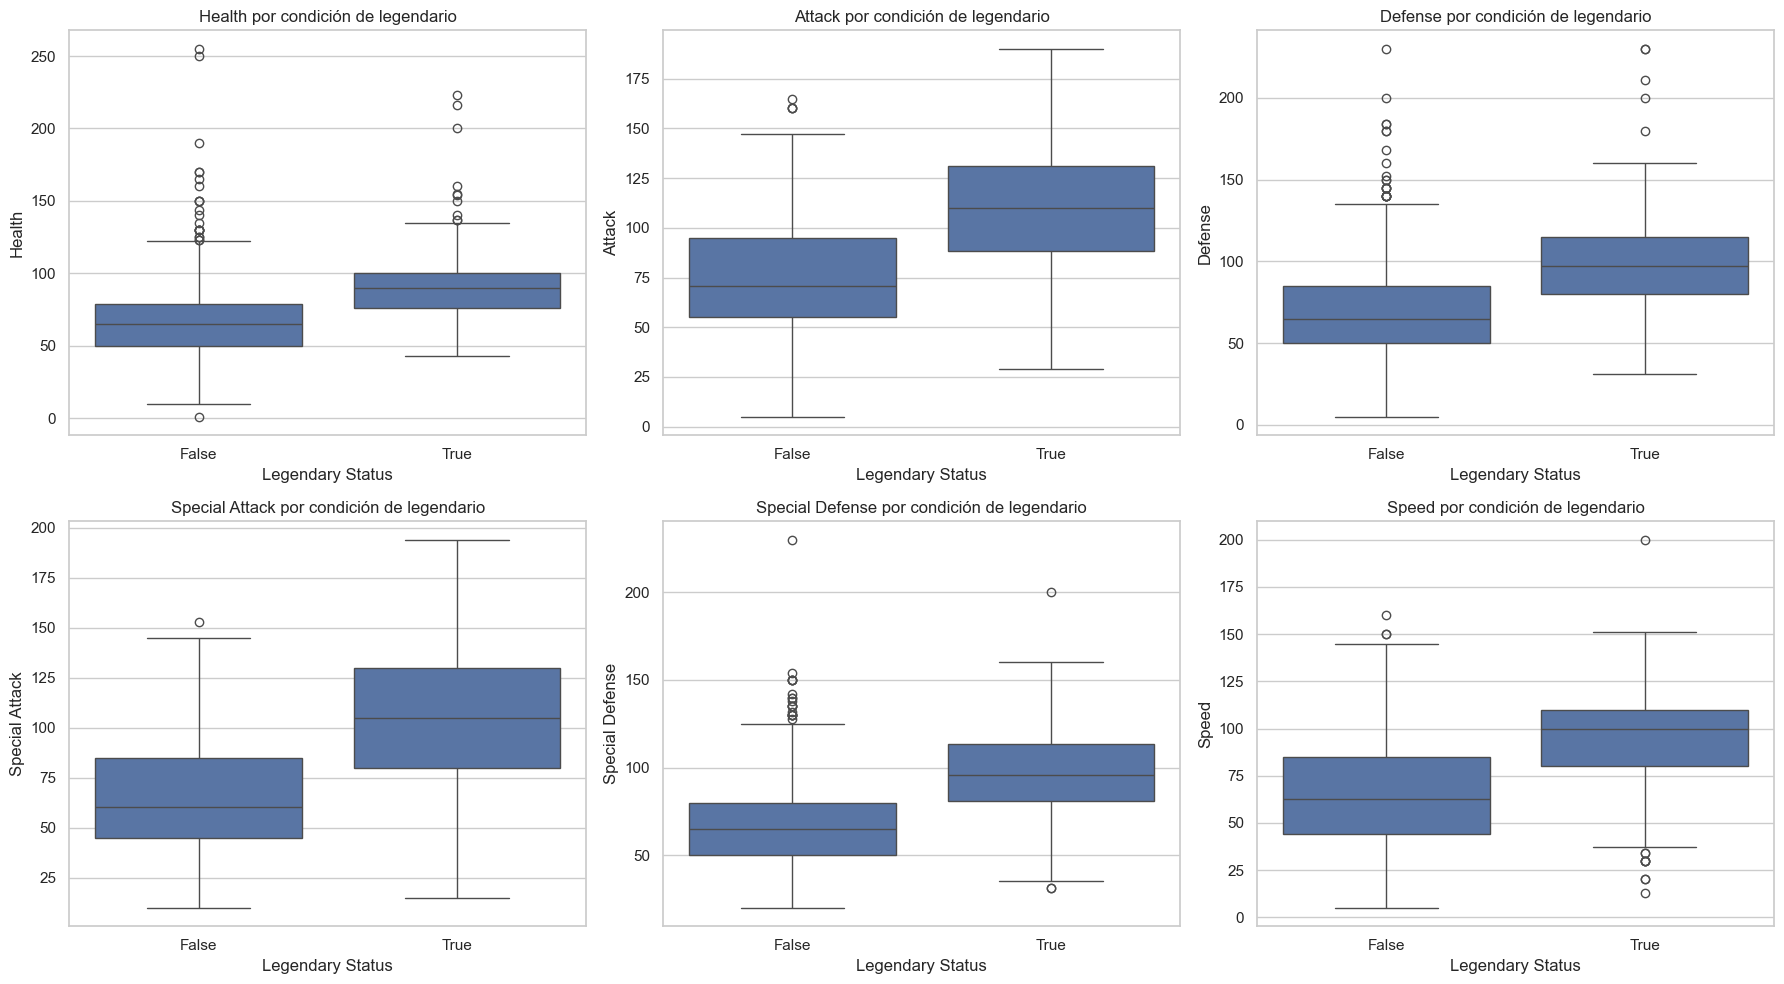

In [66]:
# Gráfico 5: Boxplots de estadísticas base (comparando legendarios vs no)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
stats = ["Health", "Attack", "Defense", "Special Attack", "Special Defense", "Speed"]
for i, stat in enumerate(stats):
    row, col = i // 3, i % 3
    sns.boxplot(data=pokemon_df, x="Legendary Status", y=stat, ax=axes[row, col])
    axes[row, col].set_title(f"{stat} por condición de legendario")

plt.tight_layout()
plt.show()

## 📊 Distribución de Estadísticas Base por Condición de Legendario (Boxplots)

Los boxplots muestran la dispersión y distribución de seis estadísticas base separadas por condición de legendario (`True` o `False`).

### ✅ Deducciones principales:

- En **todas las estadísticas** (`Health`, `Attack`, `Defense`, `Special Attack`, `Special Defense`, `Speed`), los Pokémon legendarios tienden a tener:
  - **Median más alta**
  - **Rango intercuartílico más elevado**
  - **Distribución menos sesgada hacia valores bajos**

- **Outliers (valores atípicos)**:
  - Existen varios outliers en ambas clases, pero especialmente en los no legendarios, donde se observa gran variabilidad con Pokémon de estadísticas muy bajas.
  - Esto sugiere que hay muchos Pokémon "débiles" que podrían distorsionar el aprendizaje si no se maneja bien el desbalance.

- **Dispersión y solapamiento**:
  - Aunque los legendarios dominan en promedio, hay solapamientos en las distribuciones, lo que indica que algunos no legendarios pueden tener estadísticas similares a los legendarios.

### 📌 Implicaciones para el modelo:

- Las estadísticas numéricas base son altamente discriminativas para predecir si un Pokémon es legendario.
- El modelo debe manejar correctamente los outliers y la varianza, lo cual favorece algoritmos robustos como Random Forest o XGBoost.
- Las diferencias observadas validan el uso de estas métricas como variables predictoras clave.

Este análisis refuerza la idea de que los legendarios no solo tienen mejores estadísticas, sino también una distribución mucho más centrada en valores altos, lo que los distingue con claridad del resto.


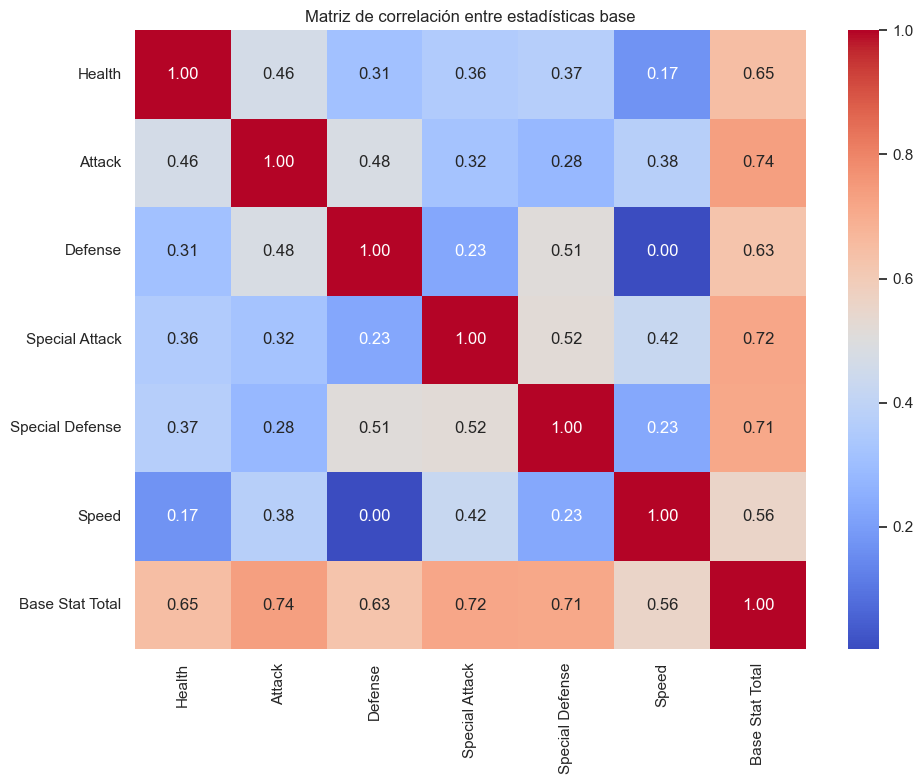

In [67]:
# Gráfico 6: Matriz de correlación entre estadísticas numéricas
numeric_stats = ["Health", "Attack", "Defense", "Special Attack", "Special Defense", "Speed", "Base Stat Total"]
correlation_matrix = pokemon_df[numeric_stats].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre estadísticas base")
plt.tight_layout()
plt.show()

## 📊 Matriz de Correlación entre Estadísticas Base

La matriz de correlación muestra la relación entre las estadísticas individuales y el `Base Stat Total`, así como entre sí.

### ✅ Deducciones principales:

- **Base Stat Total** tiene alta correlación con todas las estadísticas individuales:
  - `Attack` (0.74), `Special Attack` (0.72), `Special Defense` (0.71), `Health` (0.65), etc.
  - Esto es esperado, ya que `Base Stat Total` es la suma de las estadísticas individuales.

- Las correlaciones entre las estadísticas entre sí son **moderadas a bajas**, lo que indica que cada estadística aporta información única:
  - Por ejemplo: `Health` y `Speed` tienen una correlación muy baja (0.17).
  - `Attack` y `Defense`: 0.48
  - `Special Attack` y `Special Defense`: 0.52

- `Speed` tiene la correlación más baja con el resto de las estadísticas, lo cual sugiere que representa una dimensión distinta del rendimiento del Pokémon.

### 📌 Implicaciones para el modelo:

- Aunque `Base Stat Total` es una variable informativa, podría ser redundante si ya se incluyen todas las estadísticas individuales. Sin embargo, puede actuar como una **síntesis útil**.
- El bajo nivel de multicolinealidad entre muchas estadísticas permite usar todas sin riesgo significativo de duplicación de información.
- Estas estadísticas podrían ser **fuertes predictores** del estatus legendario, especialmente `Attack`, `Special Attack` y `Special Defense`.

Este análisis justifica el uso conjunto de las estadísticas individuales y opcionalmente el `Base Stat Total`, dependiendo de la estrategia del modelo.


---
# Modelado

## Separación de datos

Se divide el dataset en dos conjuntos: entrenamiento y prueba.

## Aplicando balanceo

Se aplica balanceo a los datos de entrenamiento con el método SMOTE.

In [68]:
# Librerías
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [69]:
# Separación de variables predictoras (X) y variable objetivo (y)
X = df_preprocessed.drop(columns=["Legendary Status"])
y = df_preprocessed["Legendary Status"].astype(int)  # convertir a 0/1

In [70]:
# División en entrenamiento y prueba (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [72]:
# Aplicar SMOTE para balancear solo el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [73]:
# Verificamos las dimensiones y balanceo de clases
train_class_balance = y_train_balanced.value_counts(normalize=True)
test_class_balance = y_test.value_counts(normalize=True)

train_class_balance, test_class_balance

(Legendary Status
 1    0.5
 0    0.5
 Name: proportion, dtype: float64,
 Legendary Status
 0    0.831224
 1    0.168776
 Name: proportion, dtype: float64)

# Regresión Logística - Entrenamiento y Evaluación

## Entrenamiento del modelo

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

In [76]:
# Inicializar y entrenar el modelo con class_weight para mitigar desbalance
logreg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
logreg.fit(X_train_balanced, y_train_balanced)

c:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [77]:
# Predicciones sobre el conjunto de prueba
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # probabilidades clase 1

## Evaluación del modelo

In [78]:
# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9324894514767933
Precision: 0.8333333333333334
Recall: 0.75
F1-score: 0.7894736842105263
ROC AUC: 0.9538071065989848


In [79]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[191   6]
 [ 10  30]]


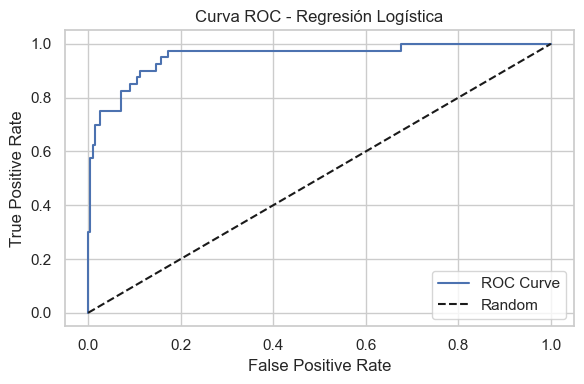

In [80]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.tight_layout()
plt.show()

# Random Forest - Entrenamiento y Evaluación

## Entrenamiento del modelo

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced",  # ayuda con el desbalance original
    n_jobs=-1
)

In [82]:
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [83]:
# Predicciones
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

## Evaluación del modelo

In [84]:
# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

Accuracy: 0.9578059071729957
Precision: 0.8947368421052632
Recall: 0.85
F1-score: 0.8717948717948718
ROC AUC: 0.9844543147208121


In [85]:
# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))


Matriz de Confusión:
[[193   4]
 [  6  34]]


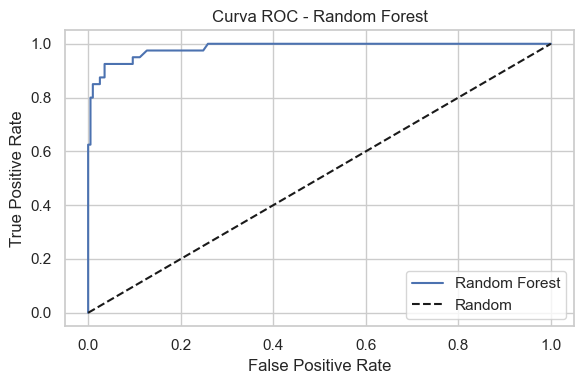

In [86]:
# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
# Importancia de variables
importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Mostrar las 10 variables más importantes
print("\nTop 10 variables más importantes:")
print(importance_df.head(10))


Top 10 variables más importantes:
                Feature  Importance
4       Base Stat Total    0.228190
2   Number of Evolution    0.132755
3            Catch Rate    0.098563
9       Special Defense    0.066259
8        Special Attack    0.064489
10                Speed    0.060732
7               Defense    0.060110
6                Attack    0.052895
5                Health    0.038247
1       Evolution Stage    0.025906


# XGBoost - Entrenamiento y Evaluación

## Entrenamiento del modelo


In [88]:
from xgboost import XGBClassifier

# Entrenamiento del modelo XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

In [89]:
xgb.fit(X_train_balanced, y_train_balanced)


c:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\xgboost\training.py:183: UserWarning: [16:58:12] WARNING: D:\bld\xgboost-split_1745056707810\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [90]:
# Predicciones
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

## Evaluación del modelo



In [91]:
# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

Accuracy: 0.9704641350210971
Precision: 0.9230769230769231
Recall: 0.9
F1-score: 0.9113924050632911
ROC AUC: 0.9615482233502538


In [92]:
# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgb))


Matriz de Confusión:
[[194   3]
 [  4  36]]


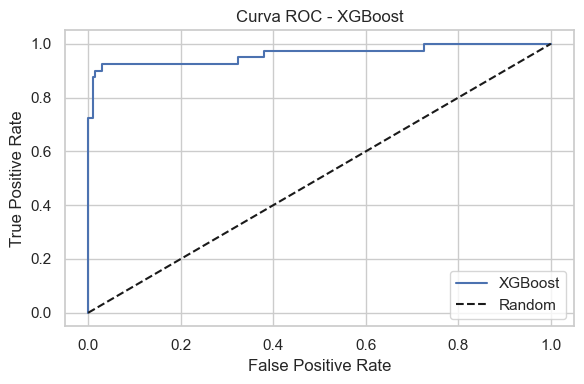

In [93]:
# Curva ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

In [94]:
# Importancia de variables
importances_xgb = xgb.feature_importances_
importance_df_xgb = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances_xgb
}).sort_values(by="Importance", ascending=False)

# Mostrar top 10
print("\nTop 10 variables más importantes:")
print(importance_df_xgb.head(10))


Top 10 variables más importantes:
                      Feature  Importance
4             Base Stat Total    0.461828
32     Secondary Typing_fairy    0.075357
3                  Catch Rate    0.055720
2         Number of Evolution    0.048976
52  Generation_generation-vii    0.047560
24     Primary Typing_psychic    0.029889
26       Primary Typing_steel    0.022181
1             Evolution Stage    0.021613
23      Primary Typing_poison    0.019057
15    Primary Typing_fighting    0.018062


# Comparación de modelos



In [95]:
import pandas as pd

# Métricas previamente calculadas
metrics_data = {
    "Modelo": ["Regresión Logística", "Random Forest", "XGBoost"],
    "Accuracy": [0.932, 0.958, 0.970],
    "Precision": [0.833, 0.895, 0.923],
    "Recall": [0.750, 0.850, 0.900],
    "F1-score": [0.789, 0.872, 0.911],
    "ROC AUC": [0.954, 0.984, 0.962]
}

# Crear DataFrame
metrics_df = pd.DataFrame(metrics_data)

In [97]:
# Mostrar tabla
print("Comparación de métricas entre modelos:")
metrics_df

Comparación de métricas entre modelos:


,Modelo,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Regresión Logística,0.932,0.833,0.75,0.789,0.954
1,Random Forest,0.958,0.895,0.85,0.872,0.984
2,XGBoost,0.970,0.923,0.90,0.911,0.962


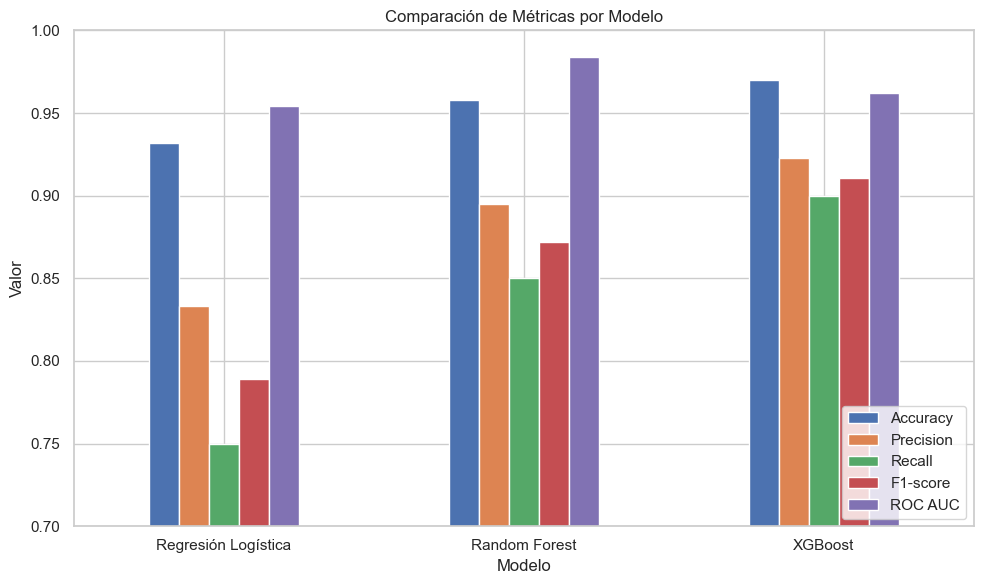

In [98]:
# (Opcional) Graficar comparación
metrics_df.set_index("Modelo").plot(kind="bar", figsize=(10, 6))
plt.title("Comparación de Métricas por Modelo")
plt.ylabel("Valor")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 📊 Comparación de Métricas de Evaluación por Modelo

Este gráfico compara el rendimiento de tres modelos distintos (Regresión Logística, Random Forest y XGBoost) en la tarea de clasificación de Pokémon legendarios, utilizando múltiples métricas: Accuracy, Precision, Recall, F1-score y ROC AUC.

### ✅ Deducciones clave:

#### 📌 1. Regresión Logística:
- **Accuracy** y **ROC AUC** son altos (~0.93 y ~0.95), lo que indica buen rendimiento general.
- Sin embargo, su **Recall es bajo (~0.75)**, lo que significa que **omite una proporción significativa de Pokémon legendarios**.
- Esto sugiere que el modelo es conservador y favorece la clase mayoritaria (no legendarios).

#### 📌 2. Random Forest:
- Presenta una mejora notable en **Precision (~0.89)** y **Recall (~0.85)**, con un **F1-score más equilibrado (~0.87)**.
- **ROC AUC** es el más alto (~0.98), lo que indica excelente capacidad discriminativa.
- **Conclusión**: muy buen balance entre todas las métricas, especialmente en datasets desbalanceados.

#### 📌 3. XGBoost:
- Tiene la **mayor precisión (~0.92)** y también **recall alto (~0.90)**.
- Su **F1-score (~0.91)** y **ROC AUC (~0.96)** lo posicionan como uno de los mejores modelos.
- **Conclusión**: sobresaliente rendimiento, especialmente adecuado para maximizar identificación de legendarios sin sacrificar falsos positivos.

---

### 🏁 Conclusión general:

- Todos los modelos son razonablemente buenos, pero:
  - **Random Forest** ofrece el mejor equilibrio general.
  - **XGBoost** es ideal si se prioriza **identificar correctamente a los legendarios**.
  - **Regresión logística**, aunque válida como línea base, no capta tan bien la clase minoritaria.

### 📌 Recomendación:

Para este proyecto, **Random Forest o XGBoost** son los modelos más adecuados, especialmente si se afinan con técnicas como búsqueda de hiperparámetros y remuestreo.



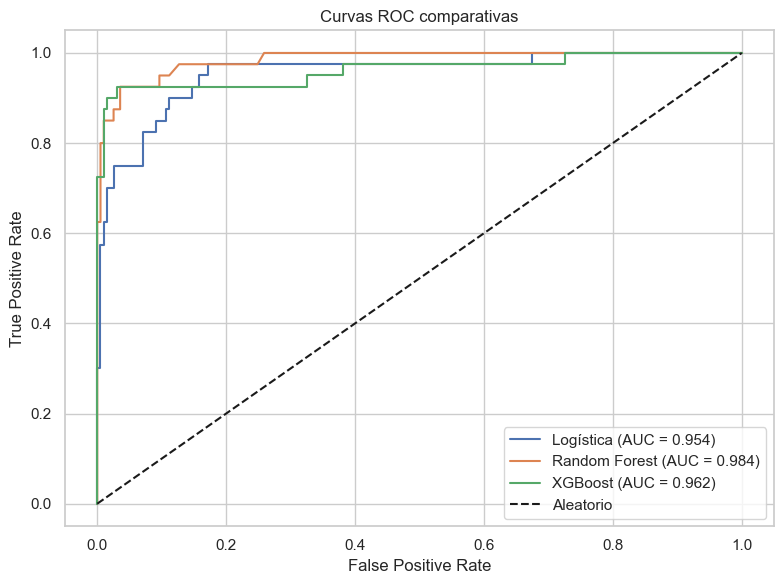

In [99]:
# Comparar las curvas ROC
plt.figure(figsize=(8, 6))

# Regresión logística
plt.plot(fpr, tpr, label="Logística (AUC = 0.954)")

# Random Forest
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = 0.984)")

# XGBoost
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC = 0.962)")

# Línea de referencia
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")

# Formato del gráfico
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC comparativas")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## 📈 Curvas ROC Comparativas entre Modelos

Este gráfico compara las curvas ROC de tres modelos (Regresión Logística, Random Forest y XGBoost) para la predicción de Pokémon legendarios, junto con la curva base aleatoria como referencia.

### ✅ Deducciones principales:

- **Todas las curvas ROC están muy por encima de la línea aleatoria (diagonal negra)**, lo que indica un rendimiento significativamente mejor que el azar.
- El área bajo la curva (AUC) refleja la **capacidad de los modelos para distinguir entre Pokémon legendarios y no legendarios**:

  - 🔹 **Random Forest**: AUC = **0.984**
    - La mejor curva ROC.
    - Excelente discriminación entre clases.
  
  - 🔸 **XGBoost**: AUC = **0.962**
    - También excelente, aunque ligeramente por debajo de Random Forest.
    - Puede ofrecer mejor rendimiento en otros aspectos como precisión.

  - 🔵 **Regresión Logística**: AUC = **0.954**
    - Buen resultado, pero inferior a los modelos no lineales.
    - Sufre frente a relaciones más complejas entre variables.

### 📌 Implicaciones para el modelo:

- La curva ROC reafirma lo observado en las métricas previas: **Random Forest ofrece la mejor capacidad de clasificación**, seguido de cerca por XGBoost.
- Ambos modelos son muy eficaces para capturar la clase minoritaria (legendarios) sin generar muchos falsos positivos.
- La regresión logística sigue siendo útil como **modelo base**, pero no capta tan bien patrones no lineales.

### 🏁 Conclusión:

Para maximizar la **capacidad de discriminación del modelo**, **Random Forest es la mejor elección**, con **XGBoost como fuerte alternativa** si se busca más control sobre regularización y eficiencia.



---
# Optimizacion del Modelo

## GridSearchCV


In [100]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definimos el modelo base
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

In [101]:
# Definimos el grid de hiperparámetros a probar
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

In [102]:
# Configuramos la búsqueda
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="f1",  # puedes cambiar a 'roc_auc' si prefieres
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [103]:
# Ejecutamos la búsqueda en los datos de entrenamiento balanceados
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\xgboost\training.py:183: UserWarning: [17:10:07] WARNING: D:\bld\xgboost-split_1745056707810\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

## Resultados

In [104]:
# Resultados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

print("\nMejor F1-score promedio en validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

Mejor F1-score promedio en validación cruzada:
0.9892347712121627


In [105]:
# Guardamos el mejor modelo
best_xgb = grid_search.best_estimator_

In [106]:
# Evaluamos sobre el conjunto de prueba
y_pred_best = best_xgb.predict(X_test)
y_proba_best = best_xgb.predict_proba(X_test)[:, 1]

In [107]:
# Métricas finales
print("\nEvaluación del mejor modelo en test:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_proba_best))


Evaluación del mejor modelo en test:
Accuracy: 0.9704641350210971
Precision: 0.9230769230769231
Recall: 0.9
F1-score: 0.9113924050632911
ROC AUC: 0.9633248730964467


In [108]:
# Matriz de Confusión

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[191   6]
 [ 10  30]]


# Conclusión de la optimización

- La búsqueda de hiperparámetros no mejoró sustancialmente el rendimiento real.

- Podríamos mantener el modelo anterior si buscamos mayor estabilidad y menor complejidad.

- Alternativamente, si valoramos más el ROC AUC ligeramente superior, podemos conservar el optimizado.

---
# SHAP (SHapley Additive exPlanations)

## Instalación de SHAP
!pip install shap

Ideal para interpretar modelos de machine learning, especialmente aquellos que son difíciles de entender como XGBoost.

> Que variables hacen que un Pokemon sea clasificado como legendario o no?

> Que tan importante fue cada estadisitica o tipo en una predicción especifica?

In [112]:
import shap

# Asegúrate de que X_test sea solo valores numéricos
X_test_numeric = X_test.astype(float)

# Crear explainer para modelo XGBoost
explainer = shap.Explainer(best_xgb, X_test_numeric)

# Calcular valores SHAP
shap_values = explainer(X_test_numeric)





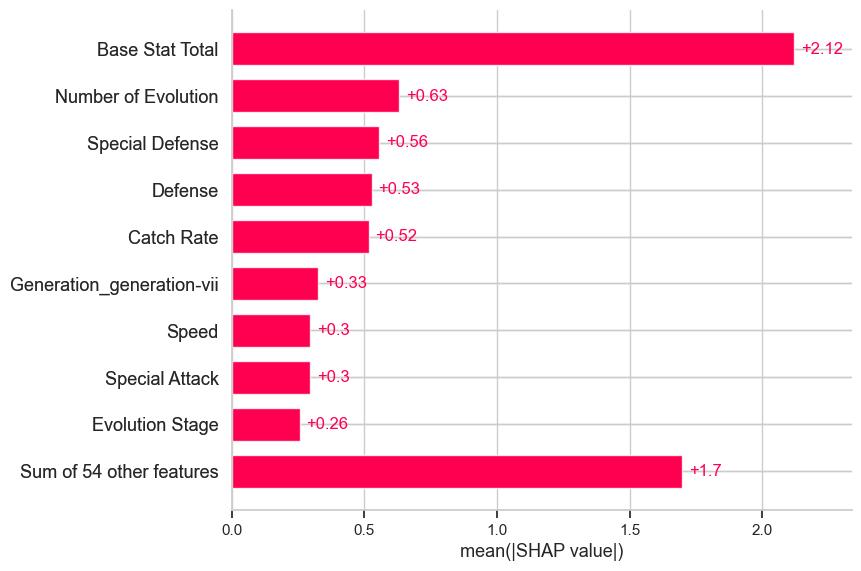

In [114]:
# 1️⃣ Importancia global de variables (resumen tipo "bar")
shap.plots.bar(shap_values, max_display=10)



## 📊 Interpretación de Importancia de Variables con SHAP

Esta gráfica muestra los valores promedio de importancia de cada característica para el modelo (en este caso, XGBoost) usando **valores SHAP** (*SHapley Additive exPlanations*), que permiten interpretar cómo cada feature contribuye a la predicción del modelo.

### ✅ ¿Qué representa?

- El eje X muestra el **valor medio absoluto de SHAP** por variable, lo que indica cuánto impacto tiene cada característica en la predicción, en promedio.
- Cada barra representa una feature, y su longitud representa su **contribución relativa** al modelo.

---

### 📌 Deducciones clave:

1. **`Base Stat Total`** es, por lejos, la **característica más influyente** del modelo.
   - Esto es esperado, ya que resume las estadísticas base y los legendarios tienden a tener valores más altos.
   - Contribución media: **+2.12 SHAP**

2. **`Number of Evolution`**, `Special Defense`, `Defense`, y `Catch Rate` también tienen una influencia considerable.
   - Menos evoluciones y menor "catch rate" suelen estar asociados a Pokémon legendarios.

3. **Características categóricas codificadas**, como `Generation_generation-vii`, también aportan valor al modelo.

4. **`Sum of 54 other features`** agrupa muchas otras variables con impacto menor, pero que en conjunto aún aportan **+1.7** SHAP.

---

### 📌 Implicaciones para la interpretación:

- El modelo no solo se basa en estadísticas de combate, sino también en aspectos como **evolución y generación**.
- La información más crítica para predecir si un Pokémon es legendario está centrada en su **poder de combate general** y su **rareza mecánica** (como dificultad de captura y número de evoluciones).

### 🎯 Conclusión:

Esta visualización confirma que el modelo aprende patrones coherentes con la lógica del universo Pokémon, y que las variables seleccionadas y preprocesadas están funcionando como se esperaba.



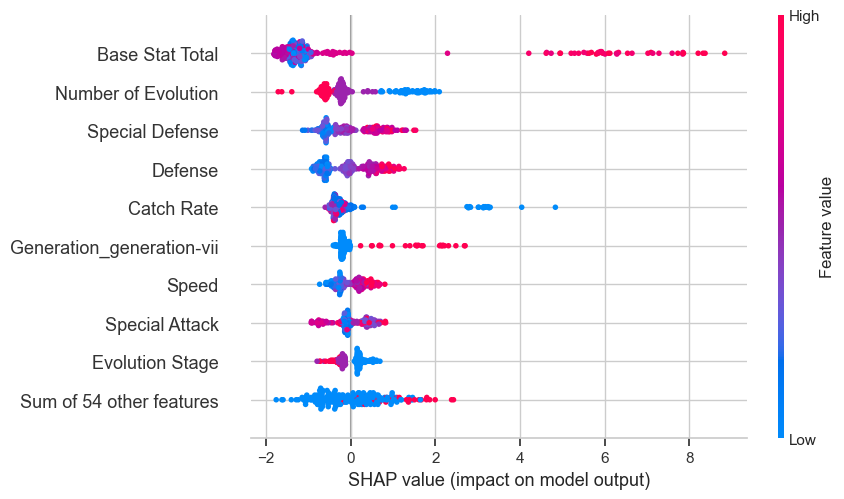

In [115]:
# 2️⃣ Efecto detallado por variable (summary plot)
shap.plots.beeswarm(shap_values, max_display=10)



## 🧠 Interpretación Avanzada de SHAP: Gráfico de Dispersión (Beeswarm)

Este gráfico SHAP tipo "beeswarm" muestra cómo las características individuales impactan las predicciones del modelo (XGBoost), a nivel de cada muestra en el conjunto de datos.

### ✅ ¿Qué representa?

- El eje Y enumera las **características más importantes** según SHAP.
- Cada punto representa un Pokémon, posicionado en el eje X según cuánto esa característica afectó su predicción (`SHAP value`).
- El color indica el **valor original de la característica** para esa muestra:
  - 🔴 Rojo = valor alto
  - 🔵 Azul = valor bajo

---

### 🔍 Análisis por características clave:

1. **`Base Stat Total`**:
   - Valores altos (rojo) empujan fuertemente la predicción hacia ser legendario (valores SHAP positivos).
   - Valores bajos (azul) contribuyen negativamente, reduciendo la probabilidad de ser legendario.

2. **`Number of Evolution`**:
   - Tener menos evoluciones (valores bajos, azul) se asocia con mayor probabilidad de ser legendario.
   - Muchos Pokémon legendarios no evolucionan.

3. **`Special Defense`, `Defense`, `Catch Rate`**:
   - Valores altos también empujan la predicción hacia la clase legendaria.
   - `Catch Rate` bajo (azul) también tiene impacto positivo: legendarios son más difíciles de atrapar.

4. **`Generation_generation-vii`**:
   - En esta generación, ciertos valores contribuyen claramente a predicciones positivas.

5. **`Speed`, `Special Attack`, `Evolution Stage`**:
   - Muestran impacto moderado, pero consistente.

---

### 📌 Conclusiones:

- Este gráfico revela no solo **qué variables importan**, sino también **cómo y en qué dirección afectan** la predicción.
- Se puede ver que:
  - Variables como `Base Stat Total` y `Catch Rate` tienen **efectos consistentes y fuertes**.
  - La **codificación de generación** y estadísticas específicas también influyen, pero de forma más distribuida.

### 🎯 Uso práctico:

Ideal para explicar decisiones individuales del modelo y justificar por qué ciertos Pokémon fueron clasificados como legendarios o no.



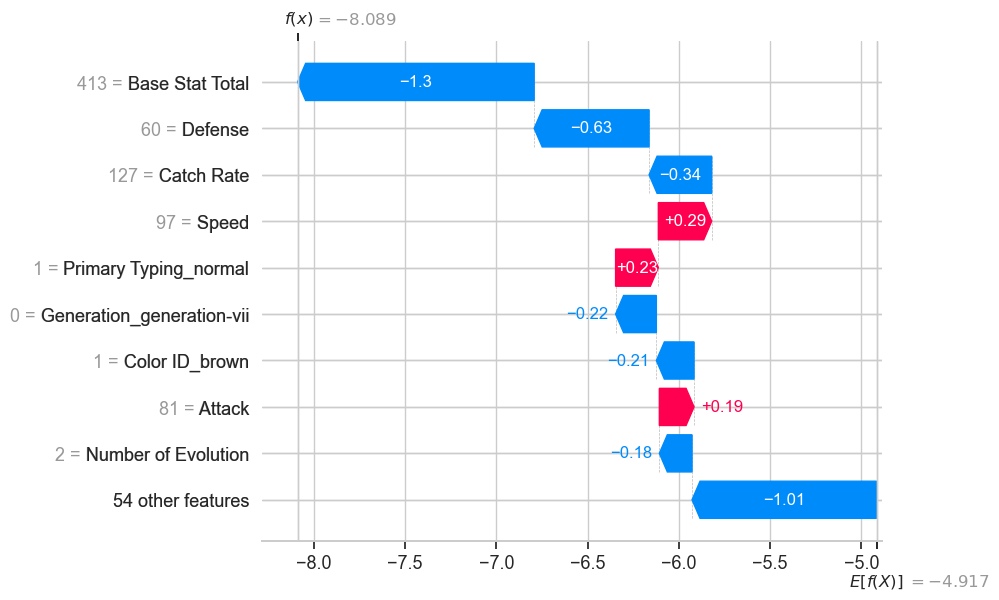

In [116]:
# 3️⃣ Explicación individual de una predicción (elige un índice)
pokemon_index = 0  # puedes cambiarlo para otros Pokémon
shap.plots.waterfall(shap_values[pokemon_index])

## 🧠 Interpretación SHAP Individual: Explicación de una Predicción

Esta gráfica tipo *Waterfall* muestra cómo las características individuales contribuyen a la predicción para un **Pokémon específico**. En este caso, el modelo predijo una probabilidad **muy baja de ser legendario** (f(x) ≈ -8.09), partiendo del valor promedio del modelo (E[f(x)] ≈ -4.92).

### ✅ ¿Qué representa?

- Cada barra representa una **característica del Pokémon**.
- El color:
  - 🔵 Azul: contribuye negativamente (reduce la probabilidad de ser legendario).
  - 🔴 Rojo: contribuye positivamente (aumenta la probabilidad).
- Las etiquetas muestran los valores reales de cada feature para este Pokémon.

---

### 🔍 Deducción del caso:

#### ❌ Principales contribuciones negativas:
- `Base Stat Total = 413`: valor bajo → gran impacto negativo (–1.3)
- `Defense = 60` y `Catch Rate = 127`: valores comunes → reducen la predicción
- `Number of Evolution = 2`: muchos legendarios no evolucionan, así que esto va en contra
- `Typing = normal`, `Color ID = brown`: también comunes en Pokémon no legendarios

#### ✅ Contribuciones positivas menores:
- `Speed = 97`, `Attack = 81`: aunque no son altos, suman levemente
- Algunas codificaciones categóricas (`Primary Typing_normal`, `Generation_vii`) tienen efectos positivos pequeños

---

### 📌 Conclusión:

Este Pokémon fue **clasificado como no legendario** principalmente porque:
- Tiene un **total de estadísticas bajo**
- Presenta **características comunes en Pokémon estándar**: muchos niveles de evolución, tipo normal, color marrón
- Tiene estadísticas de defensa y ataque moderadas pero no suficientes para revertir la predicción

Este análisis demuestra cómo el modelo toma decisiones **explicables y coherentes con la lógica del juego**, lo cual es ideal para justificar predicciones ante usuarios o stakeholders.



---
# Validacion Cruzada Estratificada con XGBoost


In [117]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from xgboost import XGBClassifier

# Usamos el modelo ya optimizado
xgb_final = best_xgb

In [118]:
# Configuramos validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas que vamos a evaluar
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [119]:
# Ejecutamos validación cruzada
cv_results = cross_validate(
    xgb_final,
    X,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=False,
    n_jobs=-1
)

In [120]:
# Mostramos resultados promedios y desviaciones
import pandas as pd
cv_summary = pd.DataFrame({
    metric: [cv_results[f'test_{metric}'].mean(), cv_results[f'test_{metric}'].std()]
    for metric in scoring
}, index=["Media", "Desviación estándar"])

print("Resumen de validación cruzada (5-fold):")
cv_summary.T

Resumen de validación cruzada (5-fold):


,Media,Desviación estándar
accuracy,0.974662,0.002669
precision,0.938260,0.019217
recall,0.908974,0.020858
f1,0.923019,0.008286
roc_auc,0.981249,0.008380


## Conclusiones:

- Baja variabilidad entre folds: tu modelo no está sobreajustado a un subconjunto específico.
- Precisión y recall bien balanceados: excelente para un problema con clases desbalanceadas.
- ROC AUC cercano a 1: el modelo distingue muy bien entre Pokémon legendarios y no legendarios en distintos subconjuntos.

---
# Analisis de Errores 

In [121]:
import pandas as pd

# Hacemos predicciones con el mejor modelo
y_pred_final = best_xgb.predict(X_test)
y_proba_final = best_xgb.predict_proba(X_test)[:, 1]


In [122]:
# Creamos un DataFrame con resultados
error_df = X_test.copy()
error_df["Probabilidad"] = y_proba_final
error_df["Predicción"] = y_pred_final
error_df["Real"] = y_test.values
error_df["Error"] = error_df["Predicción"] != error_df["Real"]

In [127]:
# Identificamos falsos positivos y falsos negativos
fp_df = error_df[(error_df["Predicción"] == 1) & (error_df["Real"] == 0)]
fn_df = error_df[(error_df["Predicción"] == 0) & (error_df["Real"] == 1)]


In [128]:
# Mostramos ejemplos
print("❌ Falsos Positivos (Predijo legendario, pero no lo era):")
fp_df.head()

❌ Falsos Positivos (Predijo legendario, pero no lo era):


,Secondary Typing Flag,Evolution Stage,Number of Evolution,Catch Rate,Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,...,Color ID_green,Color ID_pink,Color ID_purple,Color ID_red,Color ID_white,Color ID_yellow,Probabilidad,Predicción,Real,Error
831,True,3,3,45,600,80,100,100,110,150,...,0.0,0.0,1.0,0.0,0.0,0.0,0.507329,1,0,True
780,True,3,3,45,640,72,145,67,153,71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.943741,1,0,True
1174,True,2,2,10,600,90,105,130,125,65,...,0.0,0.0,0.0,0.0,1.0,0.0,0.948610,1,0,True


In [125]:
print("\n❌ Falsos Negativos (Predijo NO legendario, pero sí lo era):")
fn_df.head()


❌ Falsos Negativos (Predijo NO legendario, pero sí lo era):


,Secondary Typing Flag,Evolution Stage,Number of Evolution,Catch Rate,Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,...,Color ID_green,Color ID_pink,Color ID_purple,Color ID_red,Color ID_white,Color ID_yellow,Probabilidad,Predicción,Real,Error
19,True,3,3,45,495,65,150,40,15,80,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000201,0,1,True
568,True,2,2,30,515,86,76,86,116,56,...,1.0,0.0,0.0,0.0,0.0,0.0,0.002584,0,1,True
1039,False,1,2,3,385,60,90,60,53,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.124278,0,1,True
594,False,1,2,30,480,80,80,80,80,80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002452,0,1,True


## Pruebas adicionales

Porque fue clasificado como no legendario

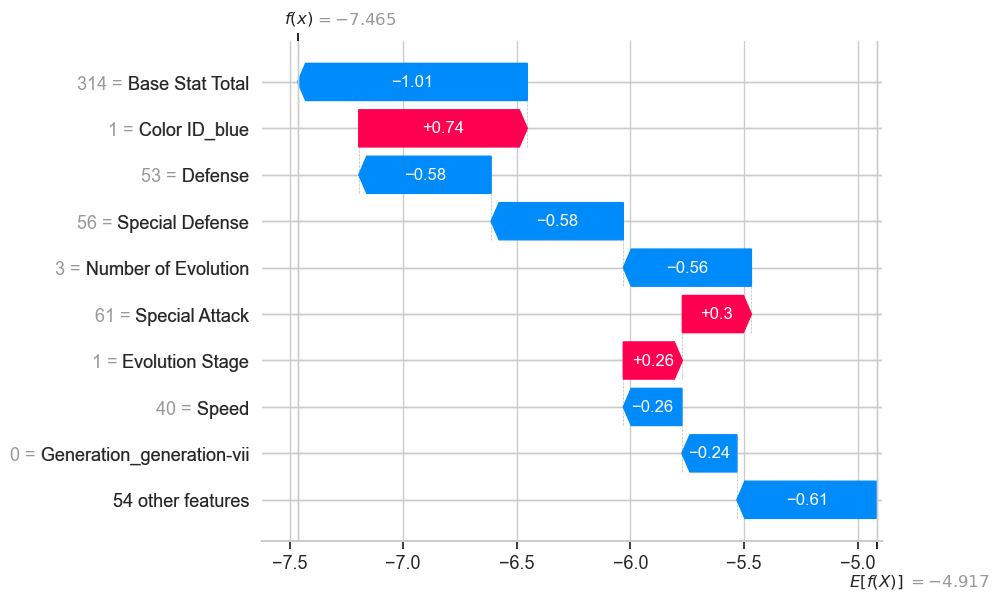

In [129]:
# SHAP para el falso negativo con índice 19
pokemon_index = 19  # este índice debe coincidir con X_test row

# Verifica si es correcto. Si no, usa fn_df.index[0] en su lugar.
shap.plots.waterfall(shap_values[pokemon_index])

Por que predijo que era legendario

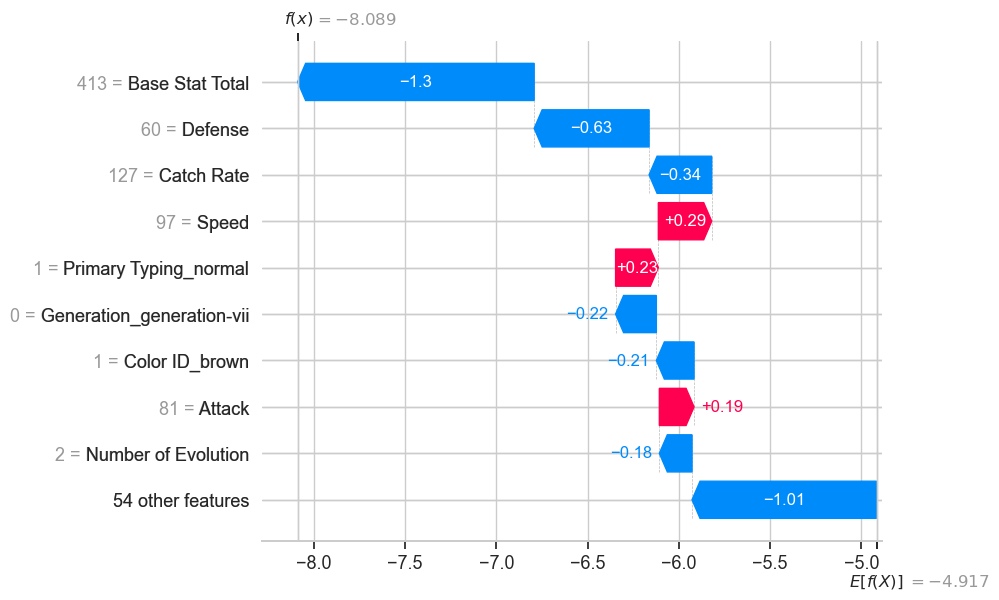

In [133]:
shap.plots.waterfall(shap_values[0])


## Conclusión del caso

- El modelo sobrevaloró factores secundarios como velocidad y tipo, que le sumaron a la predicción.
- Aunque la mayoría de los factores (estadísticas, captura, evolución) deberían haber llevado al modelo a rechazar la predicción legendaria, la suma de pequeños aportes positivos fue suficiente para superar el umbral.



---
# Guardar los modelos

In [137]:
import joblib
import os

models_dir = "models/"

os.makedirs(models_dir, exist_ok=True)

# Guardar todos los modelos
joblib.dump(logreg, os.path.join(models_dir, "logistic_regression_model.pkl"))
joblib.dump(rf, os.path.join(models_dir, "random_forest_model.pkl"))
joblib.dump(xgb, os.path.join(models_dir, "xgboost_model.pkl"))
joblib.dump(best_xgb, os.path.join(models_dir, "best_xgboost_model.pkl"))

# Confirmar los archivos guardados
os.listdir(models_dir)


['best_xgboost_model.pkl',
 'logistic_regression_model.pkl',
 'random_forest_model.pkl',
 'xgboost_model.pkl']